In [2]:
# I would start by Importing all the necessary libraries for this assignment, as below:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Next would be Importing the Training dataset for House pricing so that I can understand the data well before going into the next steps:
import pandas as pd
TrainingData = pd.read_csv(r'/content/houses_train.csv')
print(TrainingData)

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt BsmtExposure  \
0        1Fam     2Story            7            5       2003           No   
1        1Fam     1Story            6            8       1976           Gd   
2        1Fam     2Story            7            5       2001           Mn   
3        1Fam     2Story            7            5       1915           No   
4        1Fam     2Story            8            5       2000           Av   
...       ...        ...          ...          ...        ...          ...   
1455     1Fam     2Story            6            5       1999           No   
1456     1Fam     1Story            6            6       1978           No   
1457     1Fam     2Story            7            9       1941           No   
1458     1Fam     1Story            5            6       1950           Mn   
1459     1Fam     1Story            5            6       1965           No   

     HeatingQC CentralAir KitchenQual GarageType  SalePrice  
0

In [6]:
# The following commands are to check the shape and and data type of the data in the dataset:
type(TrainingData)

pandas.core.frame.DataFrame

In [7]:
TrainingData.shape

(1460, 11)

In [8]:
# Next is I will check for any null values in the training dataset for my initial understanding:
TrainingData.isnull().sum()

BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
BsmtExposure    38
HeatingQC        0
CentralAir       0
KitchenQual      0
GarageType      81
SalePrice        0
dtype: int64

In [9]:
# Next I will remove the rows with empty values. This technique should he me understand the dataset more. The command to be used here is the dropna:
TrainingData = TrainingData.dropna()

In [10]:
# We then check if the null value rows have been removed by checking again in comparison to the previous check:
TrainingData.isnull().sum()

BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
BsmtExposure    0
HeatingQC       0
CentralAir      0
KitchenQual     0
GarageType      0
SalePrice       0
dtype: int64

In [11]:
# We will notice from the below that 112 rows have been removed:
TrainingData.shape

(1348, 11)

In [12]:
# As part of data understanding, I will execute the below command to help me understand the all the data are in their required format:
TrainingData.dtypes

BldgType        object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
BsmtExposure    object
HeatingQC       object
CentralAir      object
KitchenQual     object
GarageType      object
SalePrice        int64
dtype: object

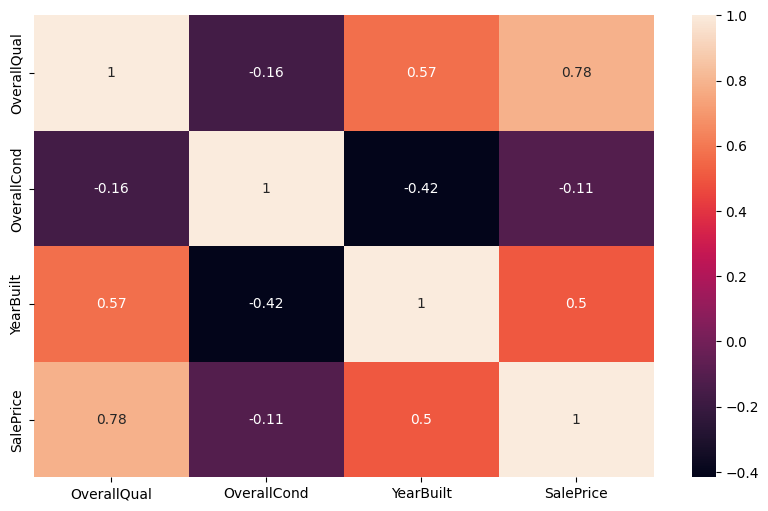

In [13]:
# Next I will start applying the descriptive exploration that shows the relationship between the attributes in the dataset. In addition, the visualizations will be used to help understand the relationship between the features and the target variable, plus the correlation coefficient and p-value

# Starting with the heatmap:

# First need to import some important libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Next we plot the heatmap for the TrainingData:
plt.figure(figsize=(10,6))
corr = TrainingData.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
# For the sake of understanding, I will generate some more statistical summary using the describe function:
TrainingData.describe()

,OverallQual,OverallCond,YearBuilt,SalePrice
count,1348.000000,1348.000000,1348.000000,1348.000000
mean,6.226261,5.591246,1973.228487,187114.717359
std,1.326446,1.077466,29.569914,79049.991288
min,2.000000,2.000000,1880.000000,35311.000000
25%,5.000000,5.000000,1956.000000,135000.000000
50%,6.000000,5.000000,1976.000000,169500.000000
75%,7.000000,6.000000,2002.000000,220000.000000
max,10.000000,9.000000,2010.000000,755000.000000


In [15]:
# From the above, i can see some irrelevant values. Next I will be looking for some Incorrect entries using the minimum and maximum values:

minimum_value = min(TrainingData)
maximum_value = max(TrainingData)

# Print the results
print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: BldgType
Maximum value: YearBuilt


In [16]:
minimum_value = TrainingData['SalePrice'].min()
maximum_value = TrainingData['SalePrice'].max()

# Print the results
print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: 35311
Maximum value: 755000


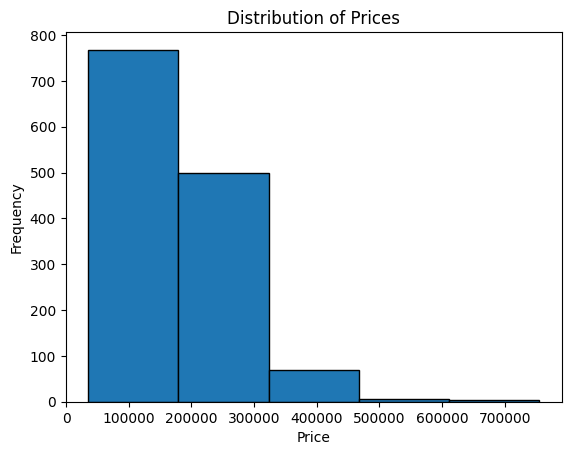

In [17]:
# The below command will showcase the distribution of the prices within the dataset:

import matplotlib.pyplot as plt

TrainingData['SalePrice'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

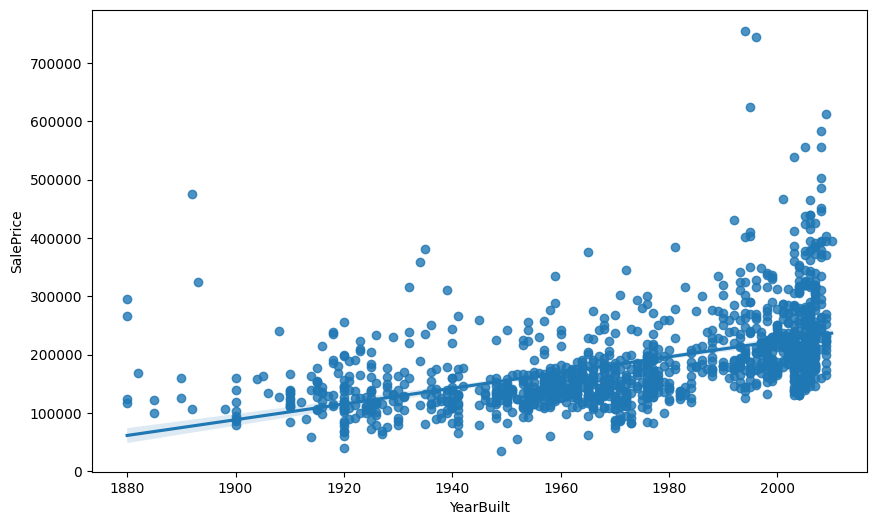

In [18]:
# Next we will get into the regression plot where we will showcase the relationship between the Year the house was built and the price advertised:

import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="SalePrice", data=TrainingData)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

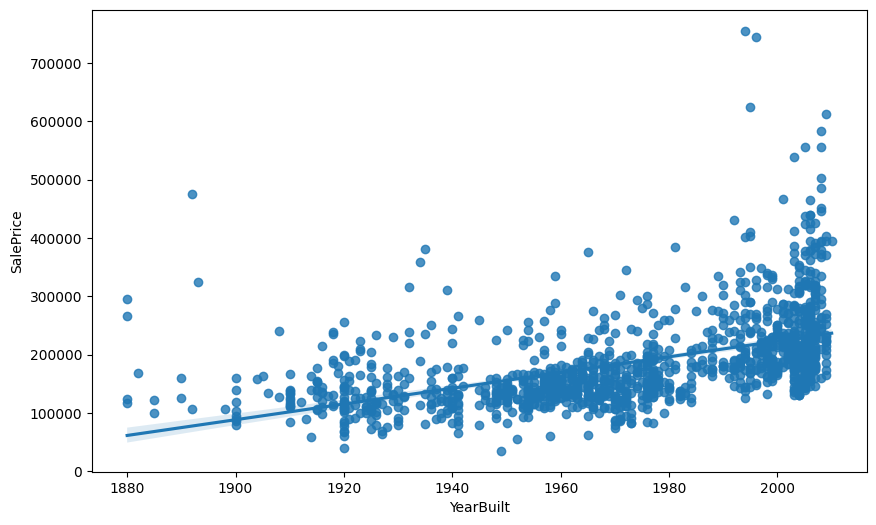

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="SalePrice", data=TrainingData)

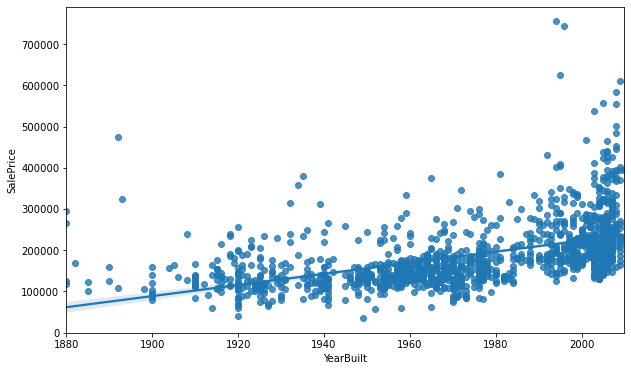

In [20]:
# Now we can look at the P_Value of our dataset for the Hypothesis testing:

from scipy import stats
pearson_coef, p_value = stats.pearsonr(TrainingData['YearBuilt'], TrainingData['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5041316834522824  with a P-value of P = 8.487819659301554e-88


<Axes: xlabel='OverallCond', ylabel='SalePrice'>

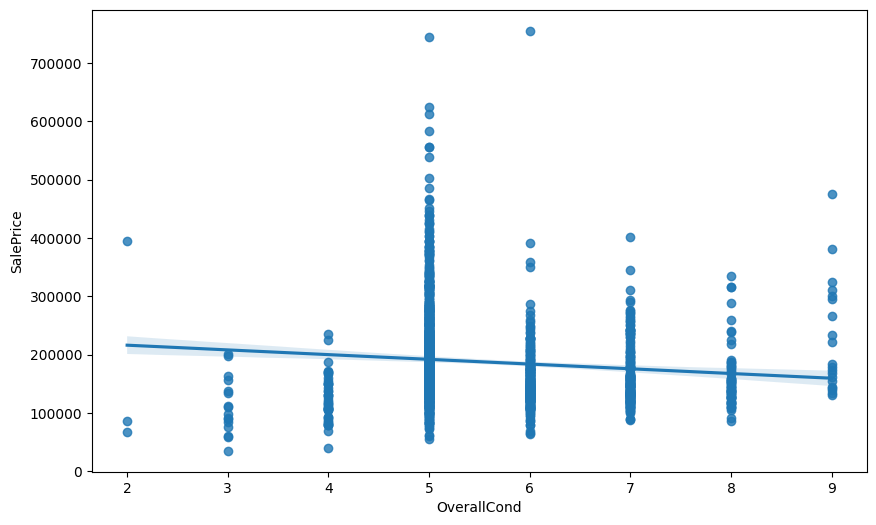

In [21]:
# In the next comparisons, I will check the houses prices against the other features given in the dataset:

plt.figure(figsize=(10,6))
sns.regplot(x="OverallCond", y="SalePrice", data=TrainingData)

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

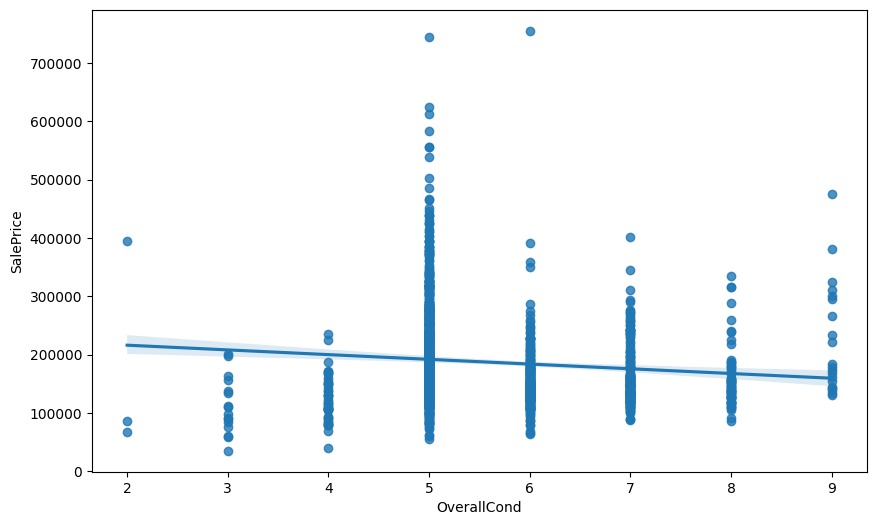

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x="OverallCond", y="SalePrice", data=TrainingData)

<Axes: xlabel='BldgType', ylabel='SalePrice'>

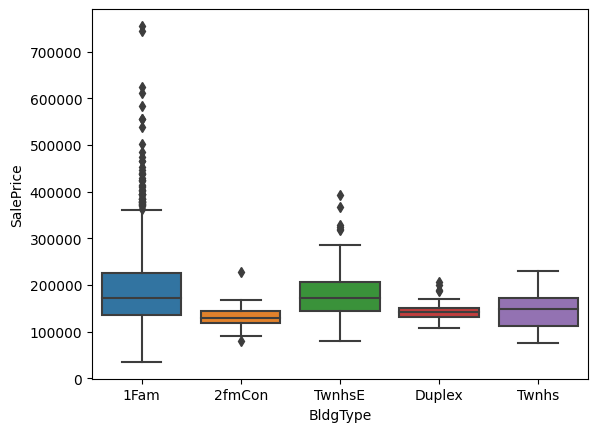

In [23]:
# Now we will get into the Box Plot analysis, where it showcase the importance of the given features for the required estimations:

sns.boxplot(x="BldgType", y="SalePrice", data=TrainingData)

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

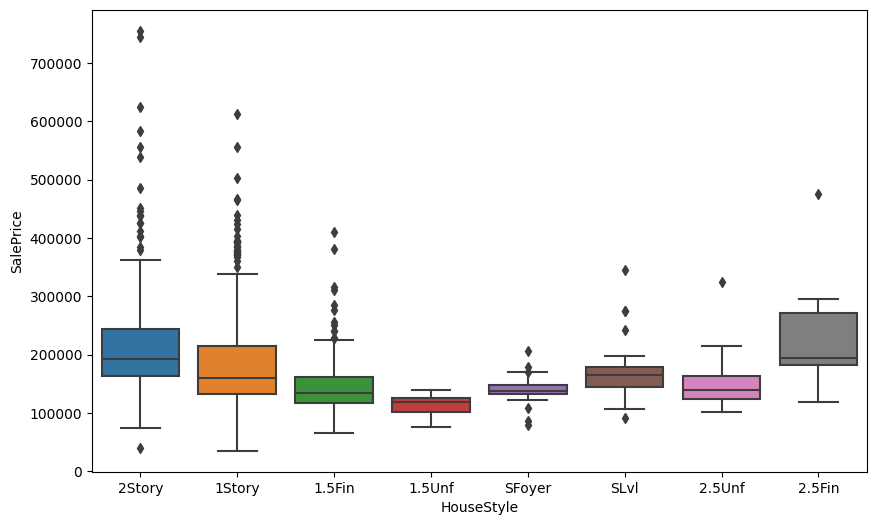

In [24]:
# This time using the House Style:
plt.figure(figsize=(10,6))
sns.boxplot(x="HouseStyle", y="SalePrice", data=TrainingData)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

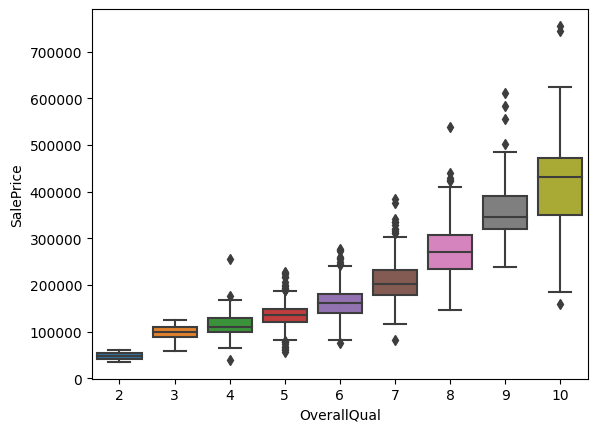

In [25]:
# This time using the Overall Quality rating of the house:
sns.boxplot(x="OverallQual", y="SalePrice", data=TrainingData)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

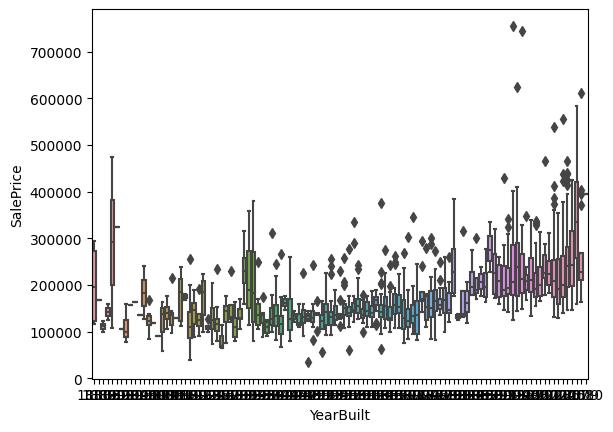

In [26]:
# This time using the Building buit year:
sns.boxplot(x="YearBuilt", y="SalePrice", data=TrainingData)

<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

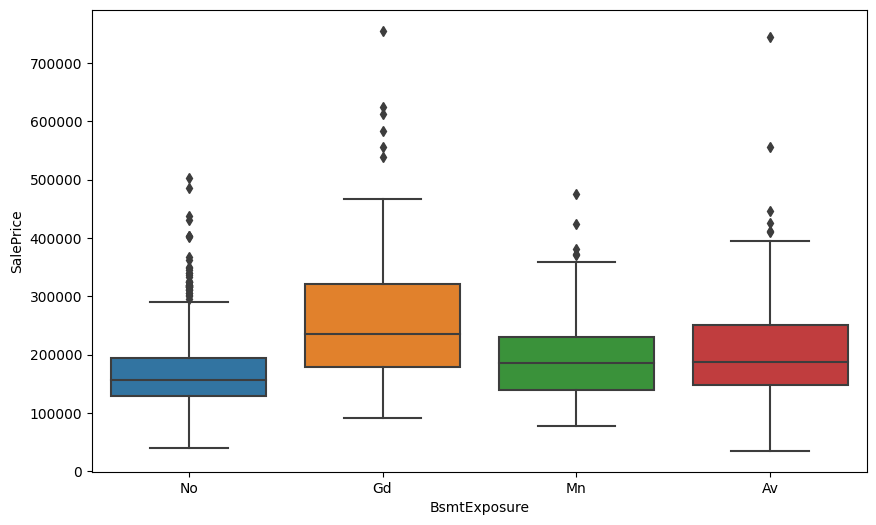

In [27]:
# Now we look at the comparison using
plt.figure(figsize=(10,6))
sns.boxplot(x="BsmtExposure", y="SalePrice", data=TrainingData)

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

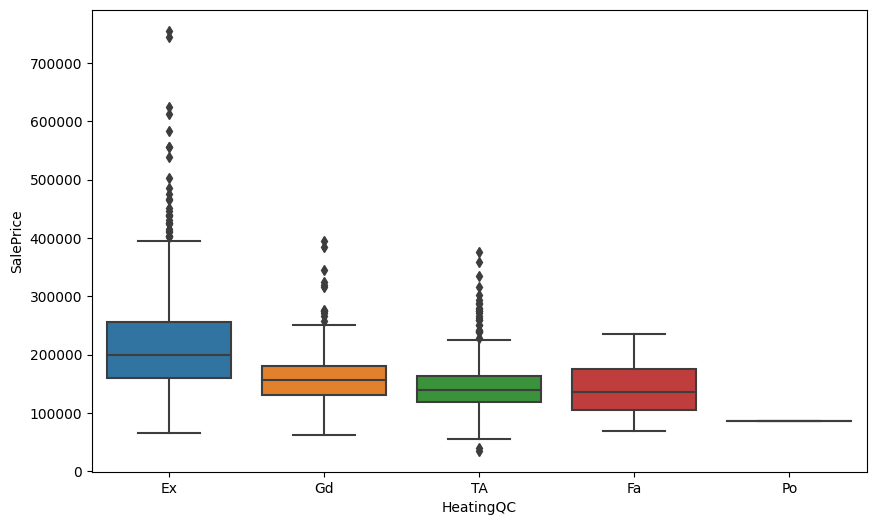

In [28]:
# Now we check using the Heating feature:
plt.figure(figsize=(10,6))
sns.boxplot(x="HeatingQC", y="SalePrice", data=TrainingData)

<Axes: xlabel='CentralAir', ylabel='SalePrice'>

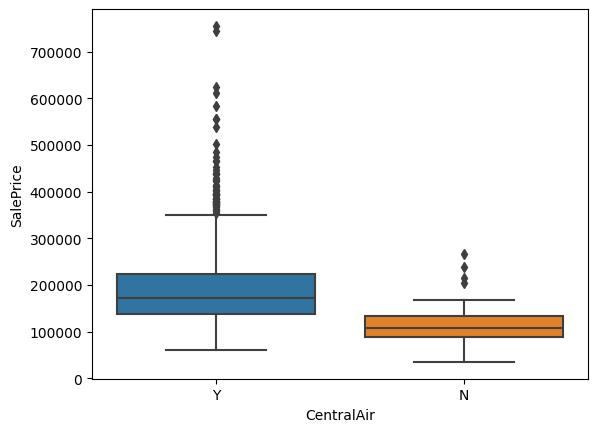

In [29]:
# Next we check against the availability of the Central Air Conditioning:
sns.boxplot(x="CentralAir", y="SalePrice", data=TrainingData)

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

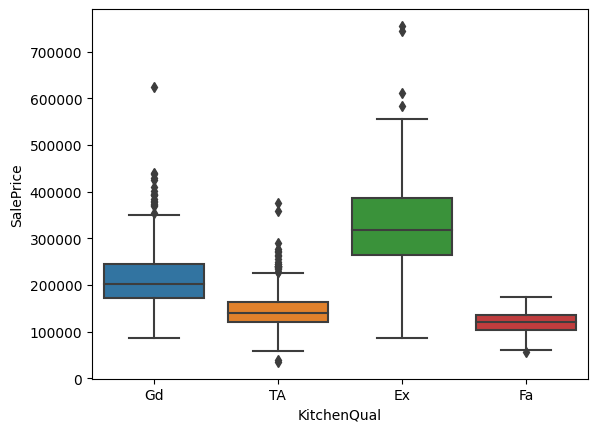

In [30]:
# Now we check against the Kitchen Quality in the house:
sns.boxplot(x="KitchenQual", y="SalePrice", data=TrainingData)

<Axes: xlabel='GarageType', ylabel='SalePrice'>

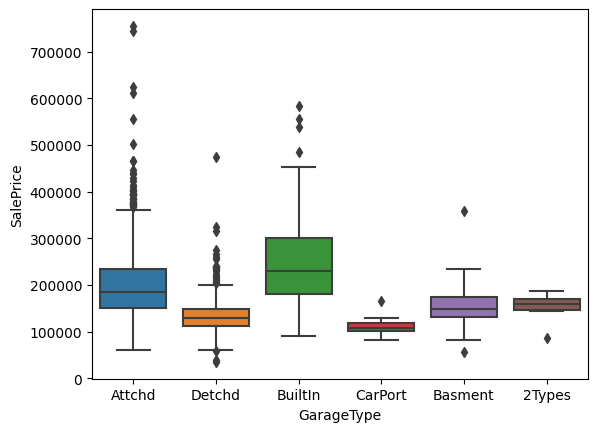

In [31]:
# Finally we check against the Garage type in the house:
sns.boxplot(x="GarageType", y="SalePrice", data=TrainingData)

In [32]:
# We now start doing the data transformation by converting textual records and columns into numerical in the dataset (Label Encoding):

labelencoder = LabelEncoder()
TrainingData.BldgType = labelencoder.fit_transform(TrainingData.BldgType)
TrainingData.HouseStyle = labelencoder.fit_transform(TrainingData.HouseStyle)
TrainingData.BsmtExposure = labelencoder.fit_transform(TrainingData.BsmtExposure)
TrainingData.HeatingQC = labelencoder.fit_transform(TrainingData.HeatingQC)
TrainingData.KitchenQual = labelencoder.fit_transform(TrainingData.KitchenQual)
TrainingData.GarageType = labelencoder.fit_transform(TrainingData.GarageType)
TrainingData.CentralAir = labelencoder.fit_transform(TrainingData.CentralAir)

In [33]:
# Now we check if the label encoding has worked on our dataset:

TrainingData.head(10)

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageType,SalePrice
0,0,5,7,5,2003,3,0,1,2,1,208500
1,0,2,6,8,1976,1,0,1,3,1,181500
2,0,5,7,5,2001,2,0,1,2,1,223500
3,0,5,7,5,1915,3,2,1,2,5,140000
4,0,5,8,5,2000,0,0,1,2,1,250000
5,0,0,5,5,1993,3,0,1,3,1,143000
6,0,2,8,5,2004,0,0,1,2,1,307000
7,0,5,7,6,1973,2,0,1,3,1,200000
8,0,0,7,5,1931,3,2,1,3,5,129900
9,1,1,5,6,1939,3,0,1,3,1,118000


In [34]:
# Now it is time for the other part of the Data Transformation. This is called Normalization, where z-score used for dropdown the numbers in the features to between the range of -1 and 1. This helps the model make better prediction as it is easy to understand.
# We start by Calculating the z-score from with scipy:

import scipy.stats as stats
TrainingData = stats.zscore(TrainingData)

In [35]:
TrainingData

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageType,SalePrice
0,-0.394558,0.994359,0.583534,-0.548941,1.007191,0.647768,-0.855687,0.217709,-0.386339,-0.704703,0.270629
1,-0.394558,-0.573355,-0.170640,2.236403,0.093762,-1.088199,-0.855687,0.217709,0.819183,-0.704703,-0.071054
2,-0.394558,0.994359,0.583534,-0.548941,0.939530,-0.220216,-0.855687,0.217709,-0.386339,-0.704703,0.460453
3,-0.394558,0.994359,0.583534,-0.548941,-1.969911,0.647768,0.298356,0.217709,-0.386339,1.551687,-0.596233
4,-0.394558,0.994359,1.337708,-0.548941,0.905699,-1.956183,-0.855687,0.217709,-0.386339,-0.704703,0.795808
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.394558,0.994359,-0.170640,-0.548941,0.871869,0.647768,-0.855687,0.217709,0.819183,-0.704703,-0.153311
1456,-0.394558,-0.573355,-0.170640,0.379507,0.161424,0.647768,1.452399,0.217709,0.819183,-0.704703,0.289611
1457,-0.394558,0.994359,0.583534,3.164850,-1.090313,0.647768,-0.855687,0.217709,-0.386339,-0.704703,1.004614
1458,-0.394558,-0.573355,-0.924814,0.379507,-0.785836,-0.220216,0.298356,0.217709,-0.386339,-0.704703,-0.569341


In [36]:
# Now we start dividing the dataset. X takes the all features while Y takes the target variable

#We start by spliting the target variable out of the independent fetures
import pandas as pd
import numpy as np

x = TrainingData.drop('SalePrice', axis=1)
y = TrainingData['SalePrice']

In [37]:
# Since i am using a single dataset 'houses_train', I will split it into test and train using the below codes:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Now we print the shape of the dataset after the splitting:

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(943, 10)
(943,)
(405, 10)
(405,)


In [38]:
# Now we start doing the encoding for all catagorical data in the testing dataset:

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
TrainingData.BldgType = labelencoder.fit_transform(TrainingData.BldgType)
TrainingData.HouseStyle = labelencoder.fit_transform(TrainingData.HouseStyle)
TrainingData.OverallQual = labelencoder.fit_transform(TrainingData.OverallQual)
TrainingData.OverallCond = labelencoder.fit_transform(TrainingData.OverallCond)

TrainingData.YearBuilt = labelencoder.fit_transform(TrainingData.YearBuilt)
TrainingData.BsmtExposure = labelencoder.fit_transform(TrainingData.BsmtExposure)
TrainingData.HeatingQC = labelencoder.fit_transform(TrainingData.HeatingQC)
TrainingData.CentralAir = labelencoder.fit_transform(TrainingData.CentralAir)
TrainingData.KitchenQual = labelencoder.fit_transform(TrainingData.KitchenQual)
TrainingData.GarageType = labelencoder.fit_transform(TrainingData.GarageType)

In [39]:
# We do a quick check on our modified training dataset:

TrainingData.head(10)

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageType,SalePrice
0,0,5,5,3,101,3,0,1,2,1,0.270629
1,0,2,4,6,74,1,0,1,3,1,-0.071054
2,0,5,5,3,99,2,0,1,2,1,0.460453
3,0,5,5,3,16,3,2,1,2,5,-0.596233
4,0,5,6,3,98,0,0,1,2,1,0.795808
5,0,0,3,3,91,3,0,1,3,1,-0.558268
6,0,2,6,3,102,0,0,1,2,1,1.517138
7,0,5,5,4,71,2,0,1,3,1,0.163062
8,0,0,5,3,32,3,2,1,3,5,-0.724048
9,1,1,3,4,39,3,0,1,3,1,-0.874641


In [40]:
# Next, we get into the Normalization type of data transformation:

# I will do this using the z-score to help scale down the features between the range of -1 and 1. This should help the model make some better
# prediction which will help with the understanding:

# I will import scipy for this:

import scipy.stats as stats
TrainingData = stats.zscore(TrainingData)


In [41]:
TrainingData

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageType,SalePrice
0,-0.394558,0.994359,0.583534,-0.548941,1.030818,0.647768,-0.855687,0.217709,-0.386339,-0.704703,0.270629
1,-0.394558,-0.573355,-0.170640,2.236403,0.074711,-1.088199,-0.855687,0.217709,0.819183,-0.704703,-0.071054
2,-0.394558,0.994359,0.583534,-0.548941,0.959995,-0.220216,-0.855687,0.217709,-0.386339,-0.704703,0.460453
3,-0.394558,0.994359,0.583534,-0.548941,-1.979149,0.647768,0.298356,0.217709,-0.386339,1.551687,-0.596233
4,-0.394558,0.994359,1.337708,-0.548941,0.924584,-1.956183,-0.855687,0.217709,-0.386339,-0.704703,0.795808
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.394558,0.994359,-0.170640,-0.548941,0.889172,0.647768,-0.855687,0.217709,0.819183,-0.704703,-0.153311
1456,-0.394558,-0.573355,-0.170640,0.379507,0.145533,0.647768,1.452399,0.217709,0.819183,-0.704703,0.289611
1457,-0.394558,0.994359,0.583534,3.164850,-1.093865,0.647768,-0.855687,0.217709,-0.386339,-0.704703,1.004614
1458,-0.394558,-0.573355,-0.924814,0.379507,-0.845985,-0.220216,0.298356,0.217709,-0.386339,-0.704703,-0.569341


In [42]:
# Now we start dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable:

# We have 11 actual columns [0-10 index]; 10 are predictor variables and 1 is the target variable

x_train=TrainingData.iloc[:,0:9]
y_train=TrainingData.iloc[:,10]

In [43]:
# We check how our split looks for x & y:

x_train.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,BsmtExposure,HeatingQC,CentralAir,KitchenQual
0,-0.394558,0.994359,0.583534,-0.548941,1.030818,0.647768,-0.855687,0.217709,-0.386339
1,-0.394558,-0.573355,-0.170640,2.236403,0.074711,-1.088199,-0.855687,0.217709,0.819183
2,-0.394558,0.994359,0.583534,-0.548941,0.959995,-0.220216,-0.855687,0.217709,-0.386339
3,-0.394558,0.994359,0.583534,-0.548941,-1.979149,0.647768,0.298356,0.217709,-0.386339
4,-0.394558,0.994359,1.337708,-0.548941,0.924584,-1.956183,-0.855687,0.217709,-0.386339


In [44]:
y_train.head()

0    0.270629
1   -0.071054
2    0.460453
3   -0.596233
4    0.795808
Name: SalePrice, dtype: float64

In [45]:
# Next is applying the Linear Regression model to my dataset:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [48]:
# With the below, I will now mark the price predection (Target Value) using the testing split in the dataset:

y_pred1 = model_mlr.predict(x_train)

In [49]:
# I will now check the values:

y_train[0]

0.2706289897675689

In [50]:
y_pred1[0]

0.5248457405113363

In [51]:
# Now, i will try using the MLR Evaluation which calculates the Mean Square Error for MLR model:

MeanSE = mean_squared_error(y_train, y_pred1)
print('The mean square error for Multiple Linear Regression: ', MeanSE)

The mean square error for Multiple Linear Regression:  0.3180055610718245


In [53]:
# Now we do the final calculation:

MeanSE= mean_absolute_error(y_train, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', MeanSE)

The mean absolute error for Multiple Linear Regression:  0.392175251262718


In [55]:
# Further Analysis using the LASSO MOdel:

# Here I will be calling the model and assigning the training data:

LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [56]:
# Now the predection using the splittted testing data:

y_pred3 = model_lm.predict(x_train)

In [58]:
# and the below will give me the Mean Squared Error for the LASSO Model
MEANae1= mean_absolute_error(y_train, y_pred3)
print('The mean absolute error of price and predicted value is: ', MEANae1)

The mean absolute error of price and predicted value is:  0.7238002172206741


In [59]:
MEANae1 = mean_squared_error(y_train, y_pred3)
print('The mean square error of price and predicted value is: ', MEANae1)

The mean square error of price and predicted value is:  1.0


NameError: ignored